In [29]:
import pandas as pd

df=pd.read_csv('MopsiLocationsUntil2012-Finland.csv', header=None, sep='\t')
df.rename(columns={0: 'latitude', 1:'longitude'}, inplace=True)
df

,latitude,longitude
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437
...,...,...
13462,626042,297444
13463,625977,297443
13464,626050,297404
13465,625995,297426


In [30]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = df[['latitude', 'longitude']].values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans.fit(scaled_data)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [33]:
kmeans_inertia = pd.DataFrame(data=[], index=range(2,21), columns=['inertia'])

for n_clusters in range(2,11):
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(scaled_data)
    kmeans_inertia.loc[n_clusters] = kmeans.inertia_
    
kmeans_inertia

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

,inertia
2,11542.15471
3,7143.914646
4,4428.809481
5,3497.353813
6,2765.442559
7,2235.965434
8,1694.265354
9,1366.675678
10,1151.443787
11,NaN


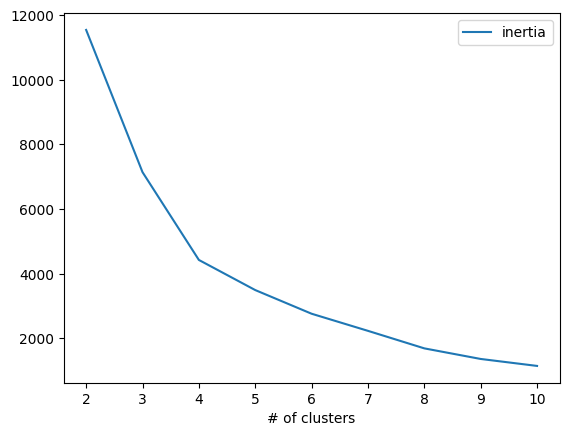

In [34]:
kmeans_inertia.plot(kind='line', y='inertia')
plt.xlabel('# of clusters')
plt.show()

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans.fit(scaled_data)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

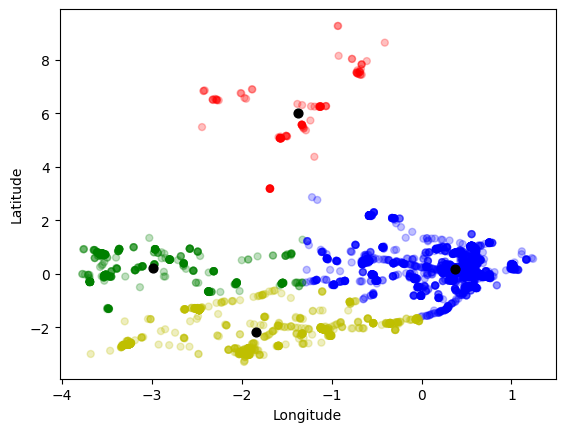

In [39]:
colors = ['b' if label == 0 else 'g' if label == 1 else 'y' if label == 2 else 'r' for label in kmeans.labels_]
# centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids = kmeans.cluster_centers_
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(scaled_data[:, 1], scaled_data[:, 0], c=colors, s=25, alpha=0.25)
plt.scatter(centroids[:,1], centroids[:,0], s=40,color='black')

The reasons I chose KMeans clustering algorithm is because it was easy to plot the data points as only two columns are there that is latitude and longitude.
KMeans algorithm provides definitive clusters as seen in above case
It was required to scale data which is done using Standard Scaler
According to the elbow plot keeping number of clusters as 4 seems reasonable.
In the above plot 4 clusters are seen which represent the map of country Finland.
The output seems correct as it is similar to the map of finland